In [1]:
from IPython.core.display import display, HTML
display(HTML("""
<style>
#notebook-container {
    width: 100%
    }

.code_cell {
       flex-direction: row !important;
    }

    .code_cell .input {
        width: 50%
    }

    .code_cell .output_wrapper {
        width: 50%
    }
    </style>
    """))

/var/folders/5h/lvh__chx16q8g20myltff36m0000gp/T/ipykernel_58518/129121222.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### <span style="color:purple">Ch. 4 - Numerical Differentiation and Integration</span> 

___Section 4.1 - Numerical Differentiation___

We have talked a lot about floating point number representations and the related source of error: __Roundoff error__

Now we are ready to use the next major tool in our toolkit: __Taylor series approximations__ 
<br>and we introduce the other major type of error:         __Truncation error__

Differentiation and integration are the basic operations of calculus
<br>so start with the definition of the derivative we've all seen in calculus:
$$\frac{d f(t)}{dt} = \lim_{\Delta t\to 0} \frac{f(t+\Delta t)-f(t)}{\Delta t}$$

Remember that floating-point arithmetic only represents a finite set of discrete numbers

We cannot actually compute $\lim_{\Delta t\to 0}$ of anything...

#### Finite difference approximation of derivatives

The feasible alternative is to compute an approximation of the limit using Taylor series:
$$
\begin{aligned}
f(t+\Delta t) &= f(t)+\Delta t\frac{df(t)}{dt}+\frac{\Delta t^2}{2!} \frac{d^2f(t)}{{d t}^2}+\ldots \\
f(t+\Delta t) &= f(t)+\Delta t\frac{df(t)}{dt}+\frac{\Delta t^2}{2!} \frac{d^2f(t)}{{d t}^2}+ O(\Delta t^3)
\end{aligned}$$

__Notational notes__: 
- In these formulas, $\Delta t$ should be read as a single quantity, and $\Delta t^n$ is taken to be equivalent to $(\Delta t)^n$ and represents the $n^{th}$ power of $\Delta t$, but we suppress the parentheses with the goal of making the equations easier to read.
- "$\ldots$" indicates higher order terms that become negligibly small for $\Delta t << 1$.
- The second version above uses "big $O$ notation" to state more specifically that the leading order neglected term (the neglected term that is larger than the rest for $\Delta t << 1$) is proportional to $(\Delta t)^3$

A more concrete statement (without negelected terms) is:

$$f(t+\Delta t) = f(t)+\Delta t\frac{df(t)}{dt} + \,\frac{\Delta t^2}{2!} \frac{d^2f(c_0)}{d t^2}\, ; \quad c_0\in[t,t+\Delta t]$$

which you may have seen when studying complex variables. 
Anyone care to name the theorem being used here to express the series remainder?

 __Cauchy's Remainder Theorem__: Next higher-order version (changing $t$ by $\pm \Delta t$) is:

$$f(t+\Delta t) = f(t)+\Delta t\frac{df(t)}{dt}+\frac{\Delta t^2}{2!} \frac{d^2f(t)}{{d t}^2}+\frac{d t^3}{3!} \frac{d^3f(c_1)}{{d t}^3}$$



$$f(t-\Delta t) = f(t)-\Delta t\frac{df(t)}{dt}+\frac{\Delta t^2}{2!} \frac{d^2f(t)}{dt^2}-\frac{\Delta t^3}{3!} \frac{d^3f(c_2)}{d t^3}$$

where $c_1\in[t,t+\Delta t]$ and $c_2\in[t-\Delta t,t]$.

Subtracting the expressions cancels even order terms to give:

$$f(t+\Delta t) - f(t-\Delta t) = 2\Delta t \frac{df(t)}{dt}+\frac{\Delta t^3}{3!} \big( \frac{d^3f(c_1)}{dt^3}+\frac{d^3f(c_2)}{dt^3} \big)$$

Can solve this for $\dfrac{df(t)}{dt} \ldots$

There are whole families of forward, backward, and centered difference estimators for derivatives of various orders.

For example, a __first-order forward difference first derivative estimator__ can be obtained directly from our first Taylor series above:

$$\frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t)}{\Delta t} + O(\Delta t)$$

To see how a central difference estimator would be constructed for a higher order derivative, add the following Taylor series designed to make the first-order term, $O(\Delta t)$, cancel:

\begin{aligned}
f(t+\Delta t) &= f(t)+\Delta t\frac{df(t)}{dt}+&\frac{\Delta t^2}{2!} \frac{d^2f(t)}{{d t}^2}+&\frac{\Delta t^3}{3!} \frac{d^3f(c_1)}{{d t}^3} \\
f(t-\Delta t) &= f(t)-\Delta t\frac{df(t)}{dt}+&\frac{\Delta t^2}{2!} \frac{d^2f(t)}{dt^2}-&\frac{\Delta t^3}{3!} \frac{d^3f(c_2)}{d t^3} \\
f(t+\Delta t) + f(t-\Delta t) &= 2 f(t)+&\Delta t^2 \frac{d^2f(t)}{dt^2}+ &O(\Delta t^4)
\end{aligned}

Moving the $2f(t)$ across the equals sign and dividing by $\Delta t^2$ (to isolate $d^2f/dt^2$)  gives a __second-order accurate estimate of the second derivative__:
$$\frac{d^2f(t)}{dt^2} = \frac{f(t+\Delta t) -2 f(t) + f(t-\Delta t)}{\Delta t^2} + O(\Delta t^2)$$

We now have an estimate of the derivative of a function based on values of the function at a specified set of points:

$$ \frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t-\Delta t)}{2\Delta t} - \frac{\Delta t^2}{3!} \frac{d^3f(c)}{dt^3}$$ 
where $$f'''(c) = \frac{1}{2} (f'''(c_1)+f'''(c_2))$$

We now have a __second-order accurate central difference estimate of the first derivative__.

__central difference__ $\iff$ __finite difference__ operator that evaluates $f$ symmetrically at smaller and larger values of $t$

__second-order accurate__ $\iff$ error term $\sim \Delta t^2$

- Typically use a truncated finite difference operator and incur a __truncation error__ associated with the terms in the series that have been omitted.

- The omitted terms are $O(\Delta t^n)$ and become smaller with finer discretization.

- Derivative estimates involve floating point operations and incur __roundoff errors__.

    - Relative error due to roundoff starts (& hopefully stays) on the order of $\epsilon_M$. 
    - Roundoff error does not continue to get smaller as $\Delta t$ is reduced.

- Major practical question: 
<br>How to handle the __tradeoff between truncation error and roundoff error__?

    - Do not want $\Delta t \sim O(1)$ because the neglected terms may not get small.
    - Do not want $\Delta t \sim O(\epsilon_M)$: $(t+\Delta t)$ and $t$ become indistinguishable for $t\sim O(1)$.
        - Finite differences produce outright failure and/or catastrophic cancellation in this regime.

#### Implement derivative estimates and illustrate how error depends on spacing

Define central difference estimate for first derivative with truncation error $O(\Delta t^2)$.

Apply to compute derivatives of $sin(t)$ near $t=\frac{\pi}{3}$.

In [1]:
import numpy as np

#define function for central difference estimate of 1st derivative
def d1(f,t,h):
    """
    Compute 2nd order central difference estimate of 1st derivative
    
    Arguments:
        f: function of one variable
        t: float value of argument at which to evaluate derivative
        h: float value of spacing
    
    """
    return (f(t+h)-f(t-h))/(2*h)

- Define:
 - Function of interest $f(t) = sin(t)$
 - Evaluation point $t=\pi/3$
 - Limit on the magnitude of the exponent $n=14$; 
 <br>i.e. consider `h=[1e0, 1e-1, 1e-2, ... , 1e-12, 1e-13]`

- Loop over exponent list computing (and printing):
    - Value of spacing 'h'
    - Finite difference estimate of derivative
    - Absolute error (which is proportional to relative error)

In [2]:
f = np.sin  #function to consider
t = np.pi/3 #evaluation point
exact = np.cos(t) #exact derivative value
n = 14 #maximum exponent of h
e_vals1 = np.zeros(n) #initialize array to store error values
print("Exact derivative: np.cos(np.pi/3)", exact)
print("  h       Error")
for i in range(0,n):
    h = 10.**(-i)
    est =  d1(f,t,h)
    error = np.abs(exact-est)
    e_vals1[i] = error
    print('{:1.0e} {: 1.9f}'.format(h,e_vals1[i]))  

Exact derivative: np.cos(np.pi/3) 0.5000000000000001
  h       Error
1e+00  0.079264508
1e-01  0.000832917
1e-02  0.000008333
1e-03  0.000000083
1e-04  0.000000001
1e-05  0.000000000
1e-06  0.000000000
1e-07  0.000000000
1e-08  0.000000003
1e-09  0.000000041
1e-10  0.000000041
1e-11  0.000000041
1e-12  0.000044450
1e-13  0.000399639


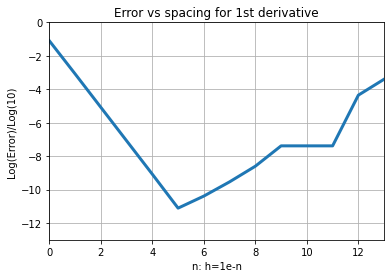

In [3]:
import matplotlib.pyplot as plt
plt.plot(np.log(e_vals1)/np.log(10), linewidth=3) 
plt.axis([0,13,-13,0])
plt.title("Error vs spacing for 1st derivative")
plt.xlabel('n: h=1e-n')
plt.ylabel('Log(Error)/Log(10)')
plt.grid(True)
plt.show()

- Observations:
    - Error in $1^{st}$ derivative estimate initially decreases as $h$ decreases from $1$ to $10^{-5}$. 
    - Error decreases from ~$10^{-1}$ to ~$10^{-11}$ (a factor of $10^{10}$) as $h$ decreases by $10^5$.
    - $\implies$ slope $\approx -2$ in this region consistent with truncation error $\sim h^{-2}$.
    <br>$y = c x^p \implies ln(y) = ln(c) + p \, ln(x) \implies$ slope matches order of error 
    - Truncation error dominates for larger $h$.
    - As $h$ decreases beyond $10^{-5}$, the relative error grows.
    - Roundoff error becomes significant and eventually dominant for small $h$.

Now let's consider what happens with central difference estimate for the $2^{nd}$ derivative.

In [4]:
#define function for central difference estimate of 2nd derivative
def d2(f,t,h):
    return (f(t+h)-2*f(t)+f(t-h))/(h**2)

f = np.sin  #function to consider
t = np.pi/3 #evaluation point
exact = -np.sin(t) #exact derivative value
n = 14 #maximum exponent of h
e_vals2 = np.zeros(n) #initialize array to store error values
print("  h       Error")
for i in range(0,n):
    h = 10.**(-i)
    est =  d2(f,t,h)
    error = np.abs(exact-est)
    e_vals2[i] = error
    print('{:1.0e} {: 1.9f}'.format(h,e_vals2[i]))  

  h       Error
1e+00  0.069805641
1e-01  0.000721447
1e-02  0.000007217
1e-03  0.000000072
1e-04  0.000000014
1e-05  0.000000374
1e-06  0.000170600
1e-07  0.000051445
1e-08  0.244197621
1e-09  0.866025404
1e-10  0.866025404
1e-11  0.866025404
1e-12  0.866025404
1e-13  0.866025404


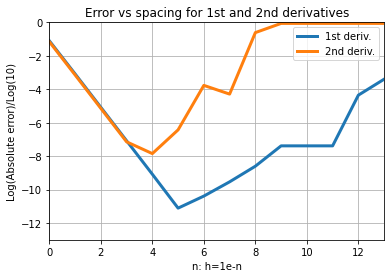

In [5]:
plt.plot(np.log(e_vals1)/np.log(10), linewidth=3, label='1st deriv.')
plt.plot(np.log(e_vals2)/np.log(10), linewidth=3, label='2nd deriv.') 
plt.axis([0,13,-13,0])
plt.title("Error vs spacing for 1st and 2nd derivatives")
plt.xlabel('n: h=1e-n')
plt.ylabel('Log(Absolute error)/Log(10)')
plt.grid(True)
plt.legend()
plt.show()

- Observations
    - Second derivative estimator exhibits similar behavior
        - Initial linear decrease
            - Slope=-2, truncation error $O(\Delta t^2) \iff$ truncation error dominates 
        - For $h \lessapprox 10^{-4}$ error grows as roundoff becomes dominant. 
        - Why does the bend occur at larger $h$ (compared to $10^{-5}$ for first derivative)?
        - Estimator again involves subtraction that leads to cancellation.
        - Error from cancellation gets amplified by $h^{-2}$ (instead of just $h^{-1}$ for first derivative).

Estimators achieve optimal accuracy for spacings on the order of $h \approx 10^{-4} \approx \sqrt[4]{\epsilon_M}$ since machine epsilon is near $10^{-16}$ for double precision arithmetic.        

In [6]:
#recall machine epsilon estimate
1.+ 1e-15 == 1, 1.+ 1e-16 == 1

(False, True)

Now compare with a $1^{st}$ derivative estimator with a higher order of accuracy; i.e. with truncation error $\sim O(\Delta t^4)$. This estimator appears as the first entry in Table 4.2:
$$f'(t)=\frac{\big[-f(t+2\Delta t)+8 f(t+\Delta t)-8 f(t-\Delta t) + -f(t-2\Delta t) \big]}{12 \Delta t}$$

Below we implement the estimator, compute error as a function of $h$, and plot the results for comparison with the previous estimator with truncation error $\sim O(\Delta t^2)$.

In [7]:
#define function for 4th order difference estimate of 1st derivative
def d1_4(f,t,h):
    return (-f(t+2*h)+8*f(t+h)-8*f(t-h)+f(t-2*h))/(12*h)

In [8]:
f = np.sin  #function to consider
t = np.pi/3 #evaluation point
exact = np.cos(t) #exact derivative value
n = 14 #maximum exponent of h
e_vals1_4 = np.zeros(n) #initialize array to store error values
print("  h   Absolute Error")
for i in range(0,n):
    h = 10.**(-i)
    est =  d1_4(f,t,h)
    error = np.abs(exact-est)
    e_vals1_4[i] = error
    print('{:1.0e} {: 1.9f}'.format(h,e_vals1_4[i]))  

  h   Absolute Error
1e+00  0.014794129
1e-01  0.000001665
1e-02  0.000000000
1e-03  0.000000000
1e-04  0.000000000
1e-05  0.000000000
1e-06  0.000000000
1e-07  0.000000001
1e-08  0.000000003
1e-09  0.000000069
1e-10  0.000000226
1e-11  0.000001892
1e-12  0.000072206
1e-13  0.000677195


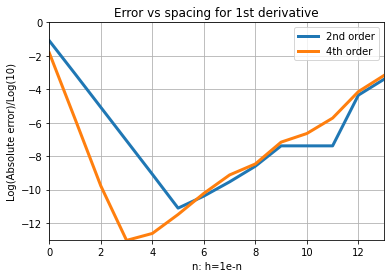

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt # import matplotlib's pyplot function under the abbreviation plt

plt.plot(np.log(e_vals1)/np.log(10), linewidth=3, label='2nd order') 
plt.plot(np.log(e_vals1_4)/np.log(10), linewidth=3, label='4th order')
plt.axis([0,13,-13,0])
plt.title("Error vs spacing for 1st derivative")
plt.xlabel('n: h=1e-n')
plt.ylabel('Log(Absolute error)/Log(10)')
plt.grid(True)
plt.legend()
plt.show()

Again the behavior is similar: The error initially decreases according to a power law (which appears linear on a log-log scale) and then increases as roundoff error becomes significant.

Note that the error for the $4^{th}$ order estimator differs from that of the $2^{nd}$ order estimator in 2 important ways:

1) The initial slope is twice as steep (consistent with error $\sim h^{-4}$).

2) Roundoff error becomes significant at a larger value of $h \approx$ `1e-3`.

Alternative approaches to computing derivatives:

- Finite difference approximations based on Taylor series (traditional numerical method that is our focus)
- Automated/algorithmic differentiation
- Symbolic computation

#### Automated/Algorithmic Differentiation

- CPU reduces everything the add, subtract, multiply, divide (Same is true for computation on GPU)
- At that low level, apply basic rules of calculus (sum rule, product rule, etc.) to produce derivative value
- Does not apply if only a sampling of function values are given (insted of function defined "everywhere" on continuous domain)
- Python package: `autograd` etc.

> Note that `autograd` is no longer under development as a separate software package and is now incorporated into JAX along with `XLA`, an optimizing compiler for machine learning. As a result, additional software install is needed to run `autograd`, and the example below will not execute properly. 
> 
> __To run the example without doing additional install, let's paste the code into a notebook in Google Colab where the necessary packages are available.__

In [10]:
# Executing cell below requires installation of JAX
import jax.numpy as jnp
from jax import grad

g1 = lambda x: x**3
x = 2.
dg1 = grad(g1)
print("At x = ", x, "the value of x**3 is ", g1(x), " and its derivative is ", dg1(x))

RuntimeError: This version of jaxlib was built using AVX instructions, which your CPU and/or operating system do not support. You may be able work around this issue by building jaxlib from source.

```
WARNING:jax._src.lib.xla_bridge:No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
At x =  2.0 the value of x**3 is  8.0  and its derivative is  12.
```

In [11]:
# multi-variable gradient (figure out later...)
g2 = lambda x,y: x**3 + y**2
x,y = 2.,3.
dg2 = grad(g2,(0,1))
print("At x = ", x, "the value of x**3 + y**2 is ", g2(x,y), " and its gradient is: 
    (", dg2(x,y)[0].copy(), ", ", dg2(x,y)[1].copy(),")")

SyntaxError: EOL while scanning string literal (12952624.py, line 5)

`At x =  2.0 the value of x**3 + y**2 is  17.0  and its gradient is: ( 12.0 ,  6.0 )`

#### Symbolic Computation

- Use python package `sympy`

    - Define symbolic variables
    - Compute/evaluate derivatives

In [12]:
from sympy import *

x,y = symbols('x y')
expr = x**3 + 2*cos(y)


In [13]:
print("f(x,y) = ", expr)
print("df/dx(2,1) = ", diff(expr,x).subs([(x,2), (y,1)]))
sym_deriv = diff(expr,y).subs([(x,2.), (y,1.)])
print("Compare symbolic result ", sym_deriv, 
      " for df/dy(2,1) with 'exact' value ", 
      -2*sin(1.))


f(x,y) =  x**3 + 2*cos(y)
df/dx(2,1) =  12
Compare symbolic result  -1.68294196961579  for df/dy(2,1) with 'exact' value  -1.68294196961579


#### Section 4.2 - Numerical Integration

- __Numerical integration__ or __Quadrature__
    - Term stems from the ancient Greeks who computed areas by constructing an equivalent square
    - Also useful to think about plotting on graph paper and counting boxes under the curve
    - Excellent example of how choosing discretization/stepsize involves tradeoff between
        - __Truncation error__
        - __Roundoff error__

- The basic ideas come from the simplest definition of the integral:
$$\int_{a}^{b} f(x) dx = \lim_{h\to 0} \sum\limits_{j=0}^{N} f(x_j) h$$
where $b-a = N h$.

- Use $Q_h[f]$ as the name for an integration scheme with a small but finite spacing $h$. (usu. suppressing $h$)

- Simplest case above:
    - Evaluation points are all equally spaced 
    - Sampled function values are equally weighted
- More general scheme would have the form:

$$Q[f] = \sum\limits_{j=0}^{N} w_k f(x_k) =  w_0 f(x_0) + w_1 f(x_1) + \ldots + w_N f(x_N)$$ 

- Exact value of the integral is
$$\int_{a}^{b} f(x) dx = Q[f] + E[f]$$
where $E[f]$ is the error in approximating the integral by the quadrature sum.

- Major practical question: 
    - How do you choose evaluation points and weights so that you know something about how the error behaves?

- There are several families of popular methods that provide an answer to this question.
- A simple and commonly used approach (that you have likely already seen in some form):
    - __Newton-Cotes formulas__ 
    - Based on polynomial interpolation.

- Write uniformly-spaced evaluation points and function values as: $x_k = x_0 + h k, \; f_k = f(x_0)$

- Consider the contribution to the integral from a sequence of $n+1$ adjacent points (starting with $n=1$): 
$$x_0, x_1=x_0 + h \mathrm{\; with \; function \; values \;} f_0, f_1$$

- Approximate the function locally as a polynomial of degree $n = 1$, e.g. a line

- Use our major tool (Taylor series) to produce estimate of truncation error:

$$\int_{x_0}^{x_0 + h} f(x) dx = Q[f] + E[f] = \int_{x_0}^{x_0 + h} \big(f_0 + \frac{f_1-f_0}{h} (x-x_0) \big) dx + \int_{x_0}^{x_0 + h} O(x-x_0)^2 dx$$ 

- Integrate the polynomial terms:

$$\int_{x_0}^{x_0 + h} f(x) dx = Q[f] + E[f] = \big(f_0 (x-x_0) + \frac{f_1 - f_0}{2 h}(x-x_0)^2 \big) \Bigr\rvert_{x-x_0 = 0}^h + O((x-x_0)^3)\Bigr\rvert_{x-x_0 = 0}^h$$

$$\int_{x_0}^{x_0 + h} f(x) dx = Q[f] + E[f] = \big(f_0 h + \frac{f_1 - f_0}{2h}h^2 \big) + O(h^3)$$

$$\int_{x_0}^{x_0 + h} f(x) dx = Q[f] + E[f] = h \big(\frac{f_0 + f_1}{2} \big) + O(h^3)$$

- Contribution from the interval between adjacent evaluation points:
    - Spacing times the average of the function values
    - Coincides with the area of the trapezoid between the interpolating line and the $x$-axis 
    - $\implies$ __trapezoidal rule__
    - Local error is $O(h^3)$ with coefficient whose bounds depends on local maximum of $f''(x)$
        - Expect this method to work well on small interval over which $f'(x)$ does not change much
        - Function is locally well-approximated by a linear interpolant.

- How do we deal with a larger interval (over which the slope changes significantly)? __Composite method__ 
    - Break the big interval up into small intervals (where the linear approximant makes sense)
    - Sum contributions from the small intervals

$$\int_{a}^{b} f(x) dx = \int_{x_0}^{x_N} f(x) dx \sim Q[f] = \sum_{j=0}^{N-1} \frac{h}{2} (f_j + f_{j+1})$$

__Composite Trapezoidal Rule Formula__

$$Q[f] = \frac{h}{2} (f_0 + f_1) + \frac{h}{2} (f_1 + f_2) + \ldots +  \frac{h}{2} (f_{N-1} + f_N)$$

$$Q[f] = \frac{h}{2} (f_0 + 2 f_1 + 2 f_2 + \ldots + 2 f_{N-1} + f_N)$$

- Uniform sampling $\begin{bmatrix} f_0 & f_1 & \ldots & f_{N-1} & f_{N} \end{bmatrix}$ dotted with coefficient array $\begin{bmatrix} 1 & 2 & \ldots &  2 & 1 \end{bmatrix}$ times $\dfrac{h}{2}$

- Take care with indexing:
     - $N$ intervals   $\implies$ point indices $0,1,\ldots,N-1,N$
     - $N-1$ intervals $\implies$ interval indices $0,1,\ldots,N-1$ 

Obtained the classic formula for uniform spacing: 
<br>Sum the samples, multiply by 2, subtract the end values, multiply by  $\dfrac{h}{2}$

Implement trapezoidal rule and explore how the error depends on the spacing. 

A first implementation might look like the following (which returns a tuple containing the spacing and the quadrature value):

In [14]:
def trap_rule(fun,a,b,n):
    """
    perform trapezoidal rule quadrature
    
    Args:
        fun: name of integrand function
        a, b: numerical integration limits (a<b)
        n: integer number of quadrature subintervals
    Returns:
        h: spacing between quadrature points
        quad: trapezoidal rule quadrature value    
    """
    x = np.linspace(a,b,n+1)
    h = (b-a)/n
    f = np.zeros(n+1)
    for i in range (n+1):
        f[i] = fun(x[i])
    quad = 0.5*h*(2*np.sum(f) - f[0] - f[-1])
    return h, quad

Test the `trap_rule` function to compute $\int_0^\pi sin(t) dt$ (for which the exact value is $2$) with different levels of sampling refinement. 

In [15]:
f = np.sin
a = 0.
b = np.pi
exact = 2. #exact integral value of integrating sin(t) on [0,1]

h, quad = trap_rule(f, a,b, 10**2)
print("h = ",h, "\nrelative error = ", 
      np.abs(exact-quad)/exact)

h, quad = trap_rule(f, a,b, 10**4)
print("h = ",h, "\nrelative error = ", 
      np.abs(exact-quad)/exact)

#h, quad = trap_rule(f, a,b, 10**11)
#print("h = ",h, "\nrelative error = ", 
#      np.abs(exact-quad)/exact)

h =  0.031415926535897934 
relative error =  8.22480562782113e-05
h =  0.0003141592653589793 
relative error =  8.224670389189725e-09


- $10^2$ sample points $\implies$ integrator works fine for a small number of evaluation points
- $10^4$ sample points $\implies$ accuracy improves with refinement in this range 
- $10^{11}$ sample points $\implies$ LARGE numbers of evaluation points cause a memory fault (which should not be attempted during class...)

Here is an alternative implementation that accumulates the contributions rather than storing them all in an array before summing:

In [16]:
def trap_rule(fun,a,b,n):
    """
    perform trapezoidal rule quadrature
    
    Args:
        fun: name of integrand function
        a, b: numerical integration limits (a<b)
        n: integer number of quadrature subintervals
    Returns:
        h: spacing between quadrature points
        quad: trapezoidal rule quadrature value    
    """
    x = a
    h = (b-a)/n
    quad = fun(a) + fun(b)
    for i in range (1,n):
        x += h
        quad += 2*fun(x)
    return h, (h/2)*quad

In [17]:
# Repeat the test cases

h, quad = trap_rule(f, a,b, 10**2)
print("h = ",h, "\nrelative error = ", np.abs(exact-quad)/exact)

h, quad = trap_rule(f, a,b, 10**4)
print("h = ",h, "\nrelative error = ", np.abs(exact-quad)/exact)

# This may take a LONG time to execute but should not cause a memory fault
#h, quad = trap_rule(f, a,b, 10**11)
#print("h = ",h, "\nrelative error = ", np.abs(exact-quad)/exact)

h =  0.031415926535897934 
relative error =  8.224805627765619e-05
h =  0.0003141592653589793 
relative error =  8.224816605562069e-09


- Code above works (result converges to exact answer), but gets slow with large number of evaluation points. 
    - Look at how the error depends on the spacing (and/or evaluation point count and/or grid refinement).
    - Include timing results using `default_timer` from python's `timeit` package:

__REMINDER: LONG run time. Do not execute cell below in class!__

In [18]:
# DO NOT EXECUTE IN CLASS
from timeit import default_timer as timer

n = 8 #maximum exponent of h
a = 0.
b = 1
e_trap = np.zeros(n) #initialize array to store error values
h_vals = np.zeros(n) #initialize array to store spacing values
n_vals = np.zeros(n) #initialize array to store number of points
times = np.zeros(n) #initialize array to store computation times
print("  h          Error        Time")
for i in range(n):
    m = 2**(i+1)
    start = timer()
    h, est =  trap_rule(np.sin,a,b,m)
    end = timer()
    times[i] = (end - start) # Time in seconds
    error = np.abs(exact-est)
    e_trap[i] = error
    h_vals[i] = h
    n_vals[i] = m+1
    print('{:1.0e} {: 1.14f} {: 1.3e}'.format(h,e_trap[i], times[i]))

  h          Error        Time
5e-01  1.54991948449592  8.658e-05
2e-01  1.54269906242850  2.438e-05
1e-01  1.54090102650828  3.150e-05
6e-02  1.54045195678779  5.192e-05
3e-02  1.54033971677116  9.192e-05
2e-02  1.54031165847973  1.713e-04
8e-03  1.54030464401390  3.319e-04
4e-03  1.54030289040413  6.501e-04


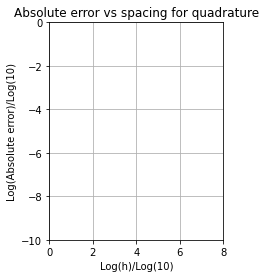

In [21]:
plt.plot(-np.log(h_vals)/np.log(10), np.log(e_trap)/np.log(10), linewidth=3) 
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0) #sets the height to width ratio to 1.5. 
plt.axis([0,8,-10,0])
plt.title("Absolute error vs spacing for quadrature")
plt.xlabel("Log(h)/Log(10)")
plt.ylabel("Log(Absolute error)/Log(10)")
plt.grid(True)
plt.savefig("figure.png") #save the plot to a file
plt.show()

- Observations:

    - Error initially decrease according to a power law.

    - Initial slope of the log-log plot is $\approx -2$ indicating truncation error $\sim O(h^{2})$. 

    - How does this match up with Eq.(4.2.6a) giving an error $\sim O(h^{3})$? That is the __local__ error.

        - With contributions from a number of intervals $\sim O(h^{-1})$, so the global error for the trapezoidal rule is $\sim O(h^{3} h^{-1}) = O(h^{2})$.

- Let's also take a look at how the errors matchup with the runtimes.

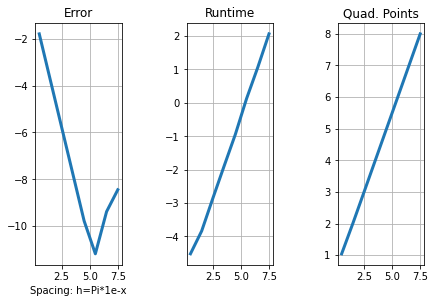

In [ ]:
# plot with various axes scales
plt.figure()

# linear
plt.subplot(131)
plt.plot(-np.log(h_vals)/np.log(10), np.log(e_trap)/np.log(10), linewidth=3)
plt.yscale('linear')
plt.title('Error')
plt.xlabel('Spacing: h=Pi*1e-x')
plt.grid(True)

# log
plt.subplot(132)
plt.plot(-np.log(h_vals)/np.log(10), np.log(times)/np.log(10), linewidth=3)
plt.yscale('linear')
plt.title('Runtime')
plt.grid(True)

# log
plt.subplot(133)
plt.plot(-np.log(h_vals)/np.log(10), np.log(n_vals)/np.log(10), linewidth=3)
plt.yscale('linear')
plt.title('Quad. Points')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=0.95, hspace=0.25,
                    wspace=0.75)

plt.show()

- For `h < 1e-5`, error grows and runtimes become impractical. (For `1e8` points, the trapezoidal rule evaluation can take minutes.)

- What can we do to get more accurate results without spending excessive amounts of time?

    - Higher order quadrature rules and adaptive subdivision. (We will come back to these...)
    - Squeeze more accuracy out of what we have already done with the trapezoidal rule
        - Use what we know about the truncation error
        - Global error $\sim O(h^{2})$.

Let's call the exact value $F$ and $Q(h)$ the quadrature value with spacing $h$. Then we have: $$F = Q(h) + c_2 h^2 + c_3 h^3 + \ldots$$ 

Consider using only every other quadrature point so the spacing is $2h$, for which:$$F = Q(2h) + c_2 (2h)^2 + c_3 (2h)^3 + \ldots$$

Multiply first equation by $2^2$ and subtract to cancel out the leading term in the truncation error to obtain:

$$3 F = 4 Q(h) -Q(2h) + O(h^3)$$ 
or 
$$F =\frac{ 4 Q(h) -Q(2h)}{3} + O(h^3)$$

Let's test out this idea to see how it works. Let's compute our test integral with 100 intervals and 200 intervals:



In [ ]:
#100 panels
h1, est1 =  trap_rule(np.sin,a,b,100)
error1 = np.abs(exact-est1)
print("With 100 panels, error is {:1.4e}".format(error1))

#200 panels
h2, est2 =  trap_rule(np.sin,a,b,200)
error2 = np.abs(exact-est2)
print("With 200 panels, error is {:1.4e}".format(error2))

With 100 panels, error is 1.6450e-04
With 200 panels, error is 4.1124e-05


The absolute errors are in the neighborhood '1e-5'. 

What happens when we combine them according the formula that aims to cancel out the leading error?

In [ ]:
est3 = (4*est2-est1)/3
error3 = np.abs(exact-est3)
print('Combined error: {: 1.4e}'.format(error3))

Combined error:  6.7648e-10


A significant error reduction is obtained without much extra work! 

This technique is known as __Richardson extrapolation__, and it is something worth knowing about.

## Return to considering other approaches for error reduction:

### Higher order quadrature methods

We obtained the trapezoidal rule by considering a "panel" consisting of the interval between $n+1=2$ quadrature points and approximating the integrand locally with a polynomial of degree $n=1$.

The Newton-Cotes family of quadrature generalizes this approach by approximating a panel of $n+1$ points with a degree $n$ polynomial.

The next member of the family, approximating 3 points with a degree 2 polynomial (i.e. a quadratic), is known as ___Simpson's rule___:

$$\int_{x_j}^{x_{j+2}} f(x) dx = \frac{h}{3} (f_j + 4 f_{j+1} + f_{j+2}) - \frac{h^5}{90}f''''(c)$$

The multi-panel version is known as __composite Simpson's rule__:
$$Q_S = \frac{h}{3} ( f_0 + 4 f_1 + 2 f_2 +4 f_3 +2 f_5 +\ldots+2f_{N-2} +4 f_{N-1} + f_N)$$

Below we present an implementation of Simpson's rule and explore how the error depends on spacing.

In [ ]:
#implement Simpson's rule
def simpson(f,a,b,n):
    """
    perform trapezoidal rule quadrature
    
    Args:
        fun: name of integrand function
        a, b: numerical integration limits (a<b)
        n: integer number of quadrature panels
    Returns:
        h: spacing between quadrature points
        quad: trapezoidal rule quadrature value    
    """
    h = (b-a)/(2*n)
    x = a + h
    quad = f(a) + 4*f(x) + f(b)
    sum = 3
    for i in range (1,n):
        x += h
        quad += 2*f(x)
        x += h
        quad += 4*f(x)
        sum += 2
    return h, (h/3)*quad

In [ ]:
# Repeat the test cases to check that things are working reasonably

h, quad = simpson(f, a,b, 10**1)
print("h = ",h, "; relative error = ", np.abs(exact-quad)/exact)

h, quad = simpson(f, a,b, 10**2)
print("h = ",h, "; relative error = ", np.abs(exact-quad)/exact)

h =  0.15707963267948966 ; relative error =  3.3922209004000337e-06
h =  0.015707963267948967 ; relative error =  3.3824010259309034e-10


Again this works, but it gets slow with large number of evaluation points. Now on to evaluating how error and runtime depend on spacing:

In [ ]:
from timeit import default_timer as timer

n = 8 #maximum exponent of h
a = 0.
b = np.pi
e_simp = np.zeros(n) #initialize array to store error values
h_vals = np.zeros(n) #initialize array to store spacing values
n_vals = np.zeros(n) #initialize array to store number of points
times = np.zeros(n) #initialize array to store computation times
print("  h      Absolute Error    Time")
for i in range(n):
    m = 10**(i+1)
    start = timer()
    h, est =  simpson(np.sin,a,b,m)
    end = timer()
    times[i] = (end - start) # Time in seconds
    error = np.abs(exact-est)
    e_simp[i] = error
    h_vals[i] = h
    n_vals[i] = m+1
    print('{:1.0e} {: 1.14f} {: 1.3e}'.format(h,e_simp[i], times[i]))

  h      Absolute Error    Time
2e-01  0.00000678444180  3.680e-05
2e-02  0.00000000067648  2.111e-04
2e-03  0.00000000000016  2.047e-03
2e-04  0.00000000000042  2.166e-02
2e-05  0.00000000000520  2.081e-01
2e-06  0.00000000000793  2.056e+00
2e-07  0.00000000029412  2.213e+01
2e-08  0.00000001031526  2.221e+02


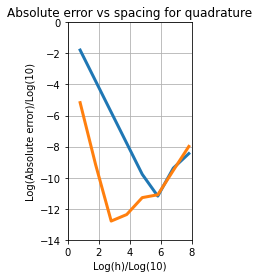

In [ ]:
plt.plot(-np.log(h_vals)/np.log(10), np.log(e_trap)/np.log(10), linewidth=3) 
plt.plot(-np.log(h_vals)/np.log(10), np.log(e_simp)/np.log(10), linewidth=3) 
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0) #sets the height to width ratio to 1.5. 
plt.axis([0,8,-14,0])
plt.title("Absolute error vs spacing for quadrature")
plt.xlabel("Log(h)/Log(10)")
plt.ylabel("Log(Absolute error)/Log(10)")
plt.grid(True)
plt.savefig("figure.png") #save the plot to a file
plt.show()

- The plot above shows the errors for both Trapezoidal rule and Simpson's rule. 
- Observations/conclusions:
    -Initial linear regime both methods become more accurate for smaller spacing. 
    - Slope for Trapezoidal rule is approximately -2 associated with global error $\sim O(h^{-4})$.
    - Note that the enhanced truncation error order leads to better accuracy for the same spacing (compared to trapezoidal)
    - BUT this means that roundoff error begins to dominate sooner (for larger spacing)
    - Optimal spacing for evaluating the test integral with Simpson's rule is $h \approx 10^{-3}$.
    
- There are many other families of quadrature schemes (e.g. Gauss-Kronrod, Clenshaw-Curtis) that employ non-uniform spacings, and you are encouraged to explore further if such things are of interest. 
- We will push on to the next embellishment of the Newton-Cotes methods: 



## Adaptive subdivision

- Our quick detour into Richardson extrapolation indicated that we can get an estimate of quadrature error by __downsampling__; i.e.ignoring every other quadrature point. 
- We obtain $Q(h)$ and $Q(2h)$, and we can use the difference in their values to estimate the error. 
- Adaptive subdivision employs this technique on a panel by panel basis as follows:

To evaluate the integral over an interval to within a specified tolerance:

1) Apply an initial quadrature scheme to obtain an initial estimate $Q_{old}$.
Subdivide each panel and apply the quadrature scheme on the subpanels to obtain $Q_{left}$ and $Q_{right}$.

2) Use $Q_{left} + Q_{right} - Q_{old}$ as a measure of local error for the panel.

3) Continue subdiving panels with largest error until sum of changes due to panel subdivision are less that global error tolerance.

It may be practical to divide up the global error into a local error tolerance that can be applied independently while subdividing the panels.